In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from collections import Counter
import string

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv


Based on a Kaggle notebook by sara_metawa

In [2]:
data = pd.read_csv("/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv")

In [3]:
data.head(2)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ce452686-3ab6-4c02-b7c4-c95386050b92,Eli Mcdevitt,Gone downhill. Used to be able to stream anywh...,1,0,7.119.0 build 1 35583,2024-06-01 22:11:45,7.119.0 build 1 35583
1,68a4ebd3-e54f-4b3c-9d8a-05d6ee86f1c7,Minh Doan,The app is crashed sometimes. I have to log in...,1,1,8.116.0 build 8 50690,2024-06-01 22:10:30,8.116.0 build 8 50690


In [4]:
red_palette = sns.color_palette("Reds", 10)

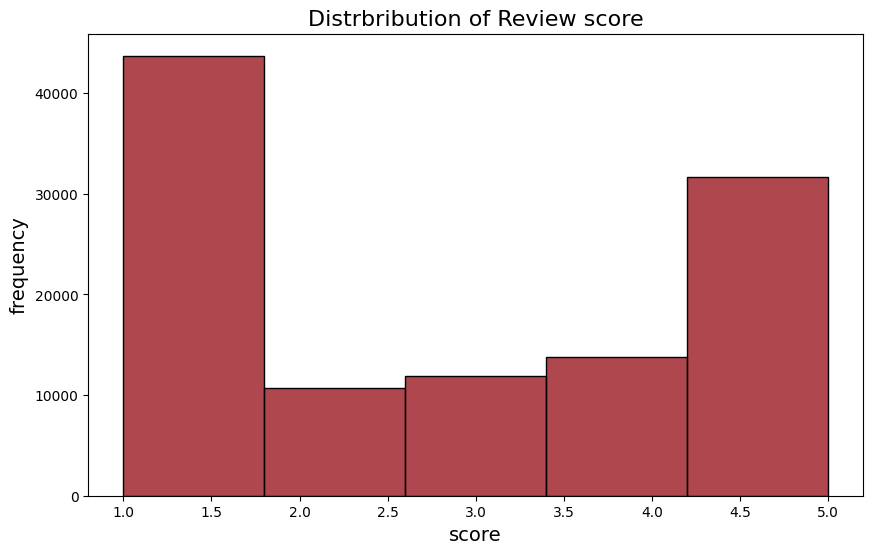

In [5]:
plt.figure(figsize = (10, 6))
sns.histplot(data['score'],bins = 5, color = red_palette[-1])
plt.title('Distrbribution of Review score', fontsize=16)
plt.xlabel('score', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.show()

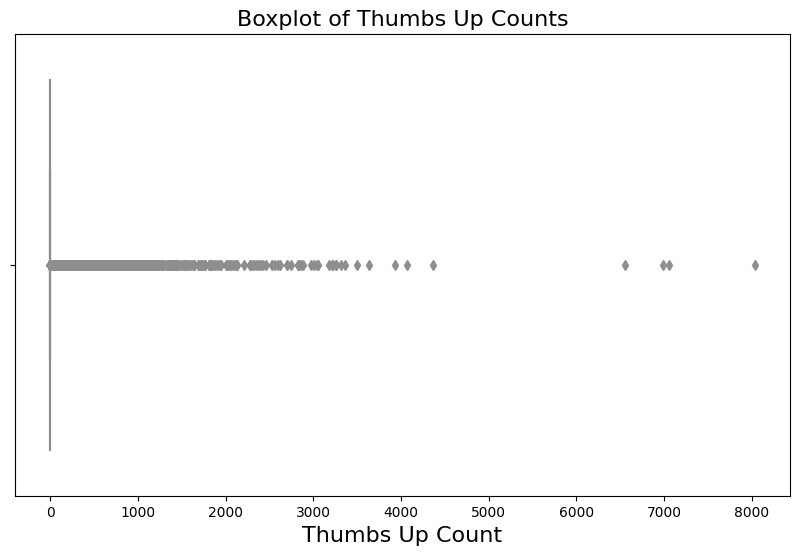

In [6]:
plt.figure(figsize= (10, 6))
sns.boxplot(x=data['thumbsUpCount'], color=red_palette[0])
plt.title('Boxplot of Thumbs Up Counts', fontsize=16)
plt.xlabel('Thumbs Up Count', fontsize=16)
plt.show()

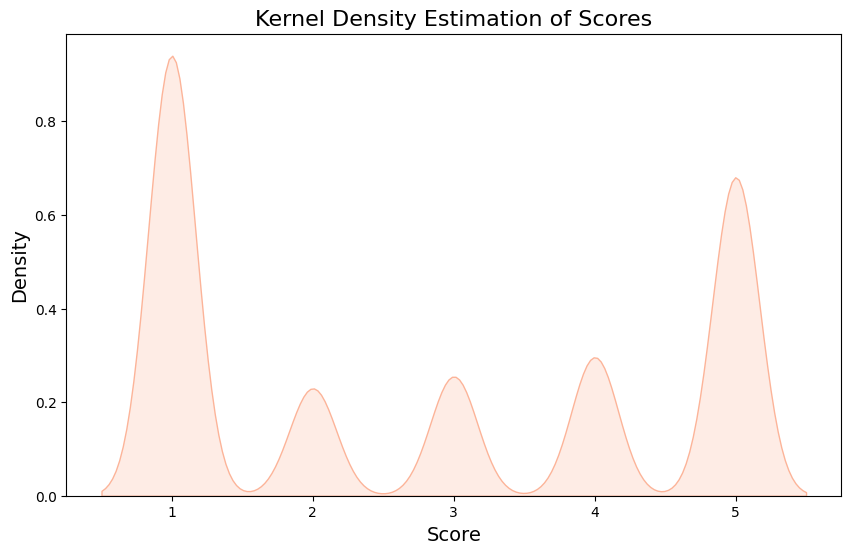

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['score'], shade=True, color=red_palette[2])
plt.title('Kernel Density Estimation of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

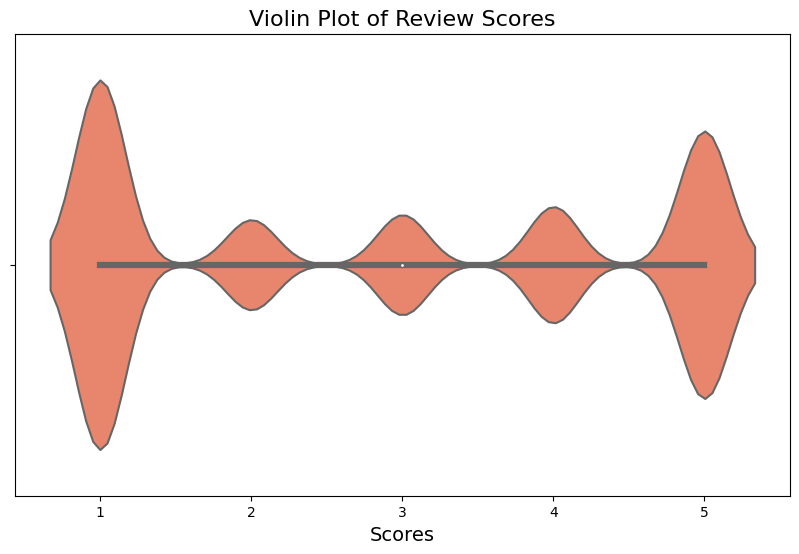

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['score'], color=red_palette[4])
plt.title('Violin Plot of Review Scores', fontsize=16)
plt.xlabel('Scores', fontsize=14)
plt.show()

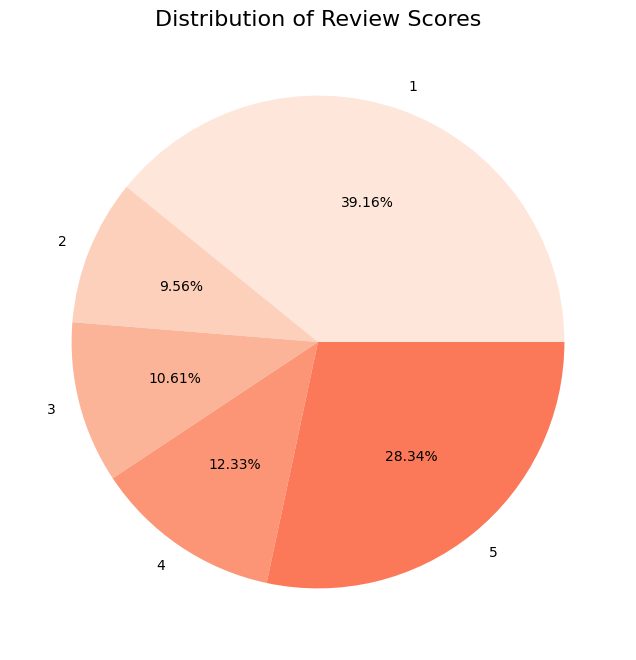

In [9]:
score_counts = data['score'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.2f%%', colors=red_palette)
plt.title('Distribution of Review Scores', fontsize=16)
plt.show()

Has anyone written a review over a period of time? If there are multiple users that wrote before and after a significant update or business decisions, that can help in making future decisions.

In [10]:
data.nunique()

reviewId                111216
userName                 78698
content                 110718
score                        5
thumbsUpCount              899
reviewCreatedVersion       551
at                      111299
appVersion                 551
dtype: int64

There are users that left more than one review.

In [11]:
data.describe()

,score,thumbsUpCount
count,111628.000000,111628.000000
mean,2.811365,10.575993
std,1.698051,101.006138
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [12]:
#data = data.drop_duplicates()
#data.nunique()
data.columns
data['content'] = data['content'].fillna('')


In [13]:
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Split into words
    words = text.split()
    return words

In [14]:
# Apply preprocessing to each review
all_words = []
for review in data['content']:
    words = preprocess(review)
    all_words.extend(words)

    # 3. Count the words
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Print the most common words
print(most_common_words)

[('the', 118448), ('i', 114404), ('to', 94275), ('and', 89560), ('it', 79937), ('is', 56731), ('a', 50473), ('netflix', 48978), ('app', 48884), ('my', 44599), ('of', 38954), ('but', 37791), ('on', 37598), ('for', 35280), ('this', 34247), ('you', 32840), ('not', 30714), ('in', 29202), ('have', 28757), ('that', 26583)]


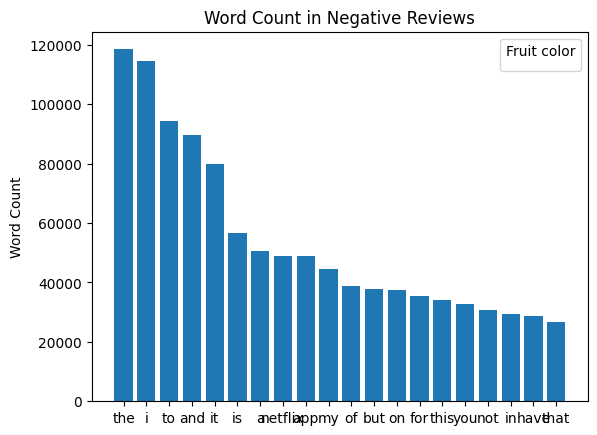

In [15]:
# visualization
fig, ax = plt.subplots()

common_words = [i[0] for i in most_common_words]
count = [j[1] for j in most_common_words]
#bar_labels = ['red', 'blue', '_red', 'orange']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(common_words, count) # label=bar_labels, color=bar_colors)

ax.set_ylabel('Word Count')
ax.set_title('Word Count in Negative Reviews')
ax.legend(title='Fruit color')

plt.show()


People do not like the app! Want to find out in more detail. Can find words that mention 'app.'